<i>Project 1: Natural Language Processing</i> | Dr. LaBrie | Winter 2020

<h1> DRUG REVIEW </h1>

This dataset presents patient reviews on specific drugs based on their related conditions and a rating score (in a scale 1 to 10) reflecting overall patient satisfaction.

The purpose of this project is to study sentiment analysis of drug experience over multiple features such as its effectiveness and side effects. The data is split into a train (75%) and a test (25%) partition.

The process proceeds in the order of <i> data exploration, data preparation, modeling, and evaluation. </i> The data exploration process will reveal data types through visualization/statistical methods. This approach allows me to set the topic, preprocess the data to fit the objective, and create various variables to fit model. 

Specifically I want to address the following questions:
1. What insights can we gain from exploring and visualizing our data?
2. How does sentiment play into rating and usefulness of reviews?
3. What machine learning models work the best for predicting the sentiment or rating based on review?
4. Can we create a way to help poeple to find the best medications to treat their illness?
5. What are the important features or words for predicting review rating?



In the modelling part, I will be using three machine learning algorithms: <b>LightGBM, XGBoost, and CatBoostClassifier</b>.  To sum up, a short conclusion will review the limitations and analysis of the project.

Data was obtained from UCI Machine Learning Repository.
(https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29)

### Contents <a id='C'></a>

<a href='#S1'><b>Step 1 - Preparing Libraries & Dataset</b></a>
<p style="margin-left: 20px">
    <a href='#IL'>Importing Libraries</a></br>
    <a href='#ID'>Importing Dataset</a></br>
</p>

<a href='#S2'><b>Step 2 - Data Exploration</b></a>
<p style="margin-left: 20px">
    <a href='#AD'>Analyzing Our Data</a></br>
    <a href='#VD'>Visualizing Our Data</a></br>
</p>

<a href='#S3'><b>Step 3 - Data Preparation</b></a>
<p style="margin-left: 20px">
    <a href='#RS'>Remove Stop Words</a></br>
    <a href='#FE'>Feature Engineering</a></br>
</p>

<a href='#S4'><b>Step 4 - Machine Learning Algorithms</b></a>
<p style="margin-left: 20px">
    <a href='#LGB'>LightGBM</a></br>
    <a href='#XGB'>XGBoost</a></br>
    <a href='#CBC'>CatBoostClassifier</a></br>
</p>

<a href='#S5'><b>Step 5 - Evaluation</b></a>

### Step 1 - Preparing Libraries & Dataset <a id='S1'></a></br><a href='#C'><font size=2><i>(Back to Contents) ↑</i></font></a>
#### <u>Importing Libraries</u> <a id='AD'></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tokenize 
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

#### <u>Importing Dataset</u> <a id='ID'></a>

In [39]:
train = pd.read_csv('drug_train.csv')
test = pd.read_csv('drug_test.csv')

In [40]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [41]:
print("The shape of the train set given is: ", train.shape)
print("The shape of the test set given is: ", test.shape)

The shape of the train set given is:  (161297, 7)
The shape of the test set given is:  (53766, 7)


In [42]:
# Droping the data points with null values
train = train.dropna(how = 'any', axis = 0)
test = test.dropna(how = 'any', axis = 0)

In [43]:
print("The shape of the train set given is: ", train.shape)
print("The shape of the test set given is: ", test.shape)

The shape of the train set given is:  (160398, 7)
The shape of the test set given is:  (53471, 7)


In [44]:
# Merge the train and test data
merge = [train, test]
data = pd.concat(merge)
data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


### Step 2 - Data Exploration <a id='S2'></a></br><a href='#C'><font size=2><i>(Back to Contents) ↑</i></font></a>
#### <u>Analyzing our Data</u> <a id='AD'></a>

In [45]:
data.shape

(213869, 7)

In [46]:
# Converts all uppercase characters in a string into lowercase characters
data.columns = data.columns.str.lower()

In [47]:
# Sorting dataframe
data.sort_values(['uniqueid'], ascending = True, inplace = True)
data.reset_index(drop = True, inplace = True)

In [48]:
# Dropping the null values
data['condition'].isnull().sum(axis=0)

0

In [49]:
data.dtypes

uniqueid        int64
drugname       object
condition      object
review         object
rating          int64
date           object
usefulcount     int64
dtype: object

In [50]:
data.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4


In [14]:
# Find the index label corresponding to the minimum value in the given series object
data.at[data['usefulcount'].idxmin(),'drugname']

'Medroxyprogesterone'

In [15]:
# Find the number of rows/columns by label(s)
data.loc[data['rating'] == 0, :].shape

(0, 7)

In [16]:
data.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4


In [17]:
data.describe()

,uniqueid,rating,usefulcount
count,213869.000000,213869.000000,213869.000000
mean,116076.924786,6.991149,28.094118
std,67016.705794,3.275792,36.401377
min,0.000000,1.000000,0.000000
25%,58122.000000,5.000000,6.000000
50%,115972.000000,8.000000,16.000000
75%,174018.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [18]:
# Converting the date in to date time format
data['date'] = pd.to_datetime(data['date'])

In [19]:
data.head(3)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7


#### <u>Visualizing our Data</u> <a id='VD'></a>

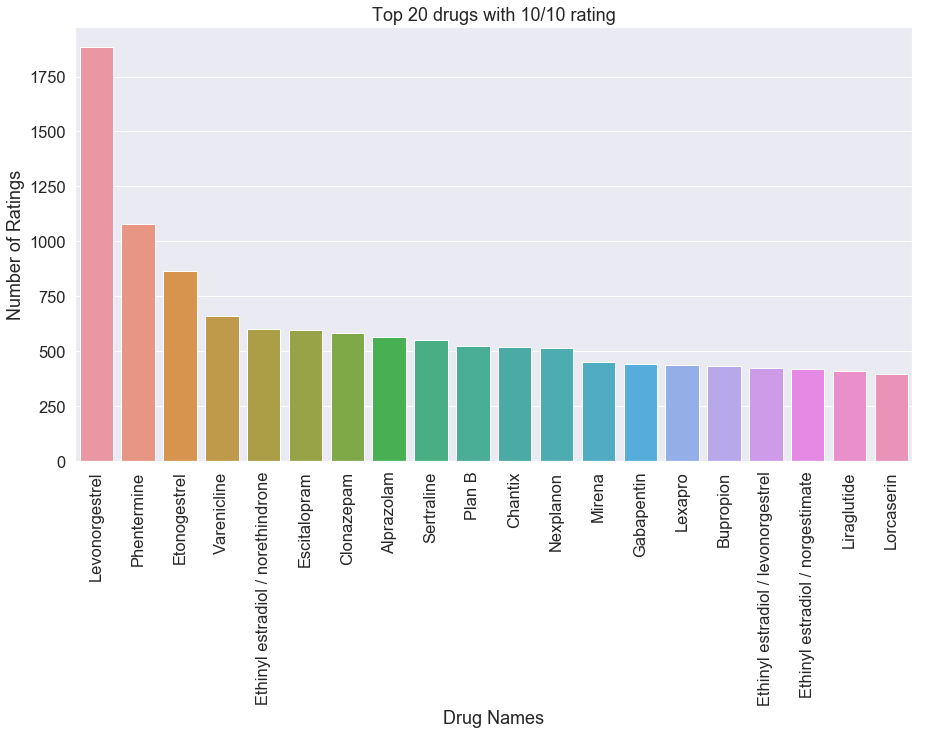

In [20]:
# Create barplot: Top 20 drugs with the 10/10 rating

# Setting the parameter
sns.set(font_scale = 1.5, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, 'drugname'].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname [0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

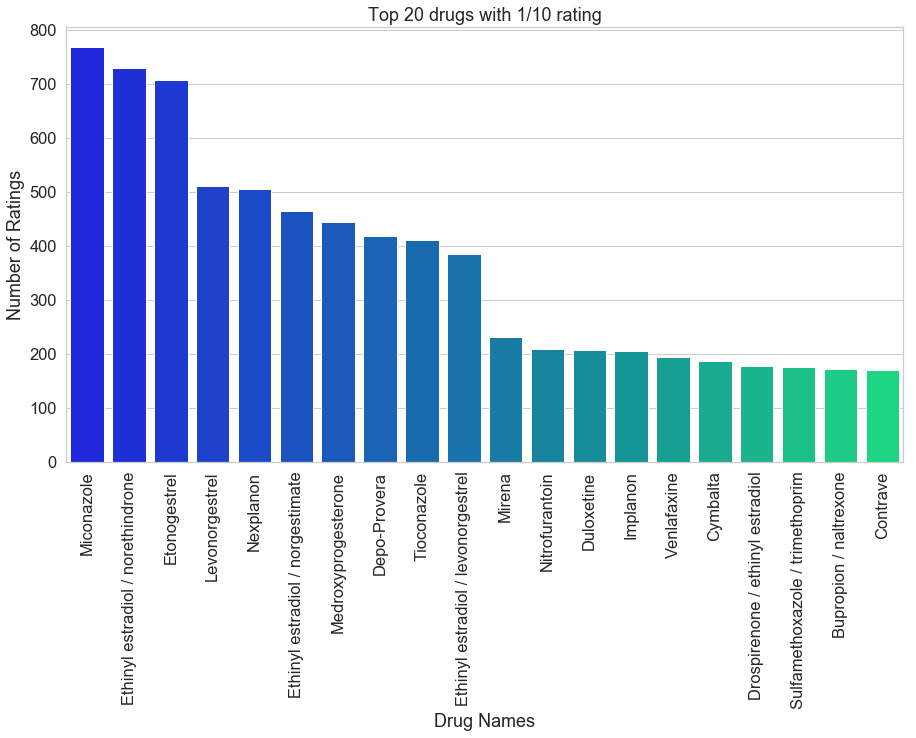

In [21]:
# Create barplot: Top 20 drugs with 1/10 rating

# Setting the parameter
sns.set(font_scale = 1.5, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Text(0.5, 0, 'Rating')

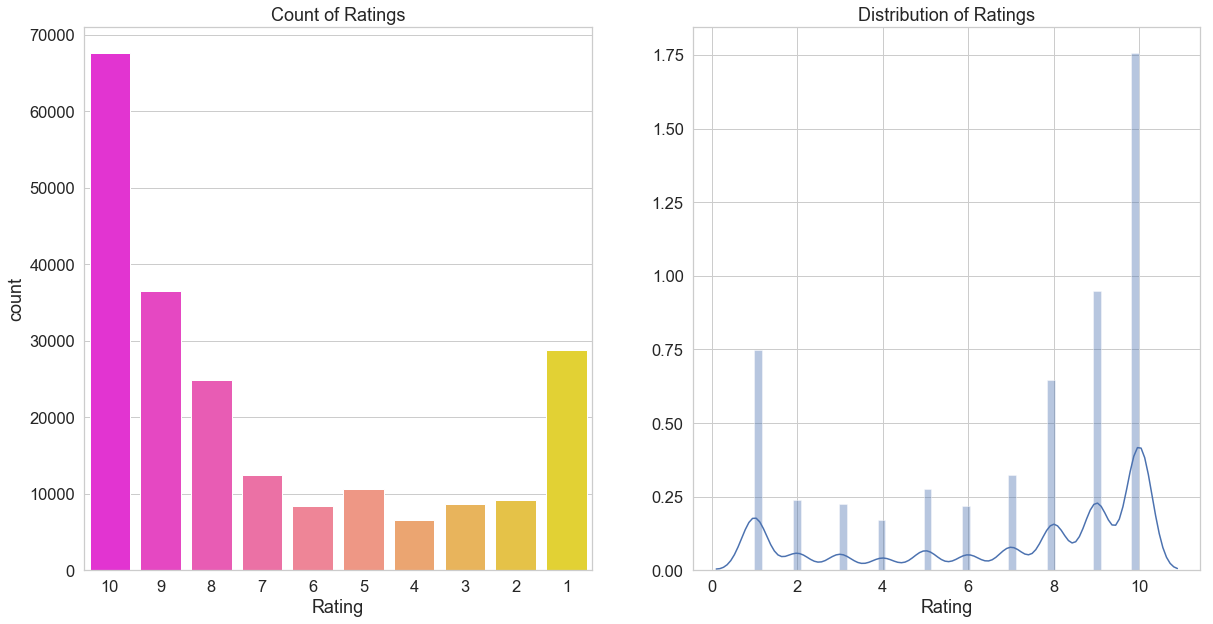

In [22]:
# Find distribution of the ratings
plt.rcParams['figure.figsize'] = [20,10]
sns.set(font_scale = 1.5, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)


sns_1 = sns.countplot(data['rating'], palette = 'spring', 
                      order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

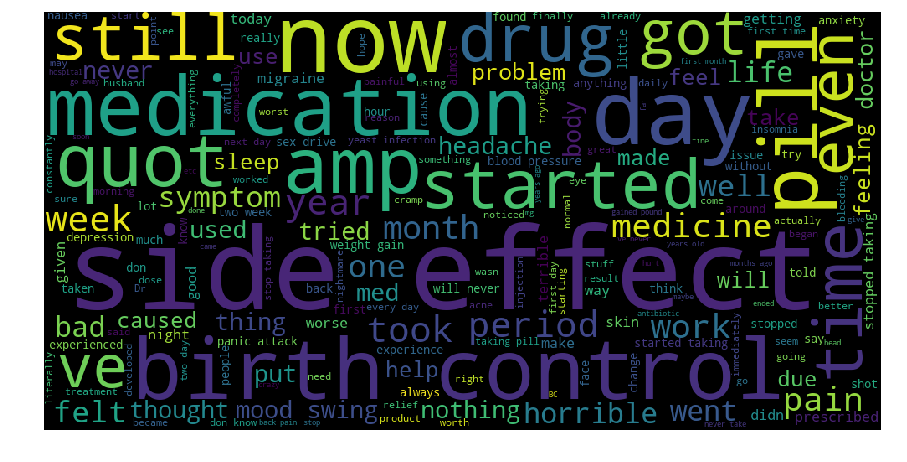

In [23]:
# Create Word Cloud of the reviews with rating equal to 1
rate_ten = data.loc[data.rating == 1, 'review']
k = (''.join(rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

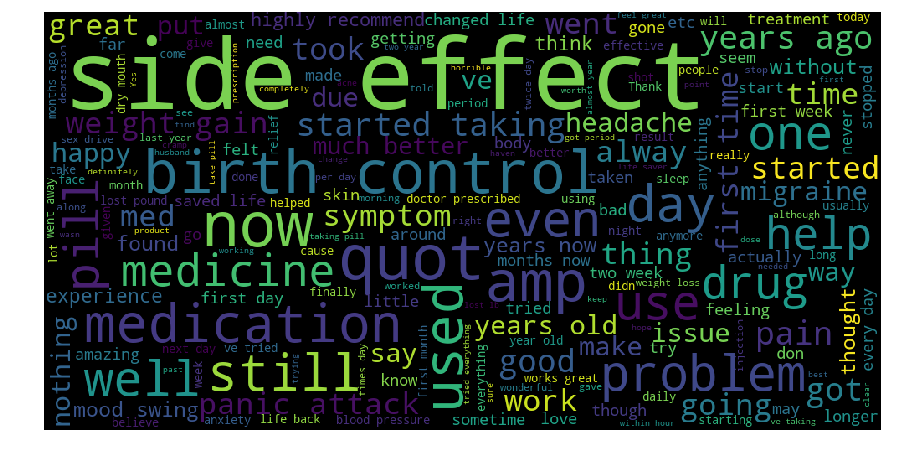

In [24]:
# Create Word Cloud of the reviews with rating equal to 10
rate_ten = data.loc[data.rating == 10, 'review']
k = (''.join(rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

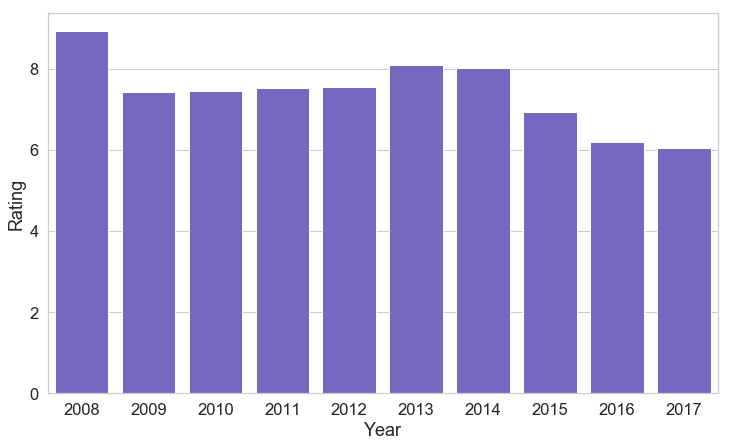

In [25]:
# Create barplot: Find the mean rating per year
mean_rating = dict(data.groupby(data['date'].dt.year)['rating'].mean())
plt.rcParams['figure.figsize'] = [12, 7]
sns.set(font_scale = 1.5, style = 'whitegrid')
sns_ = sns.barplot(x = list(mean_rating.keys()), y = list(mean_rating.values()), color = 'slateblue');
sns_.set_xlabel("Year")
sns_.set_ylabel("Rating");

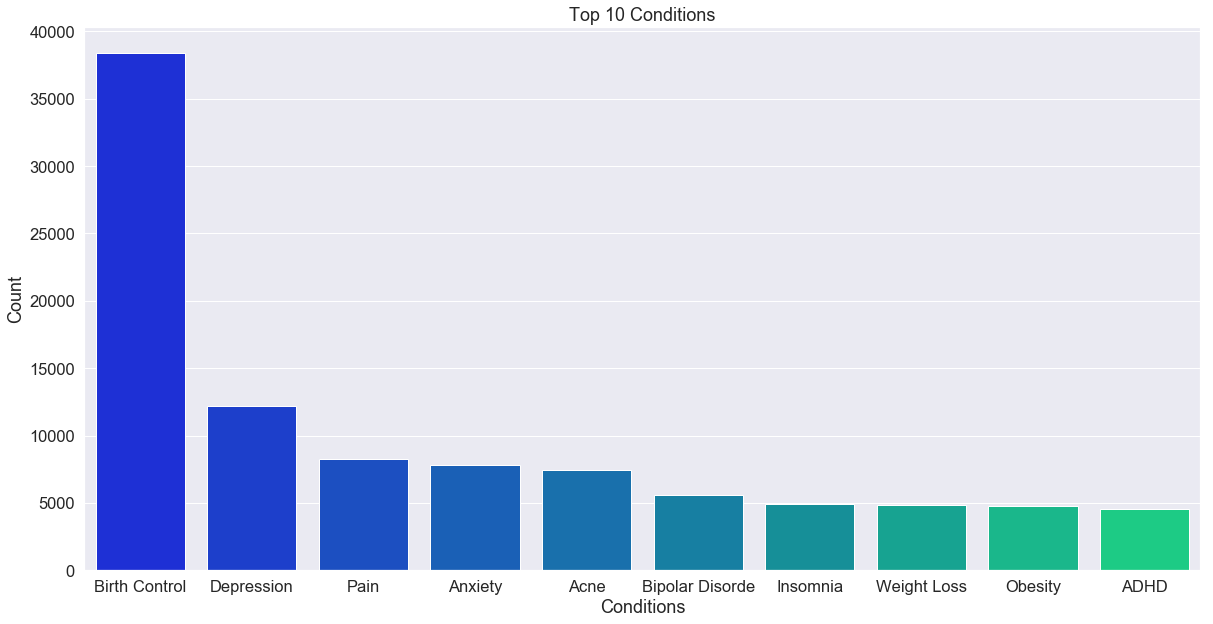

In [26]:
# Create barplot: Top 10 conditions the people are suffering
condition = dict(data['condition'].value_counts())
top_condition = list(condition.keys())[0:10]
values = list(condition.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.5)
plt.rcParams['figure.figsize'] = [20, 10]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 Conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

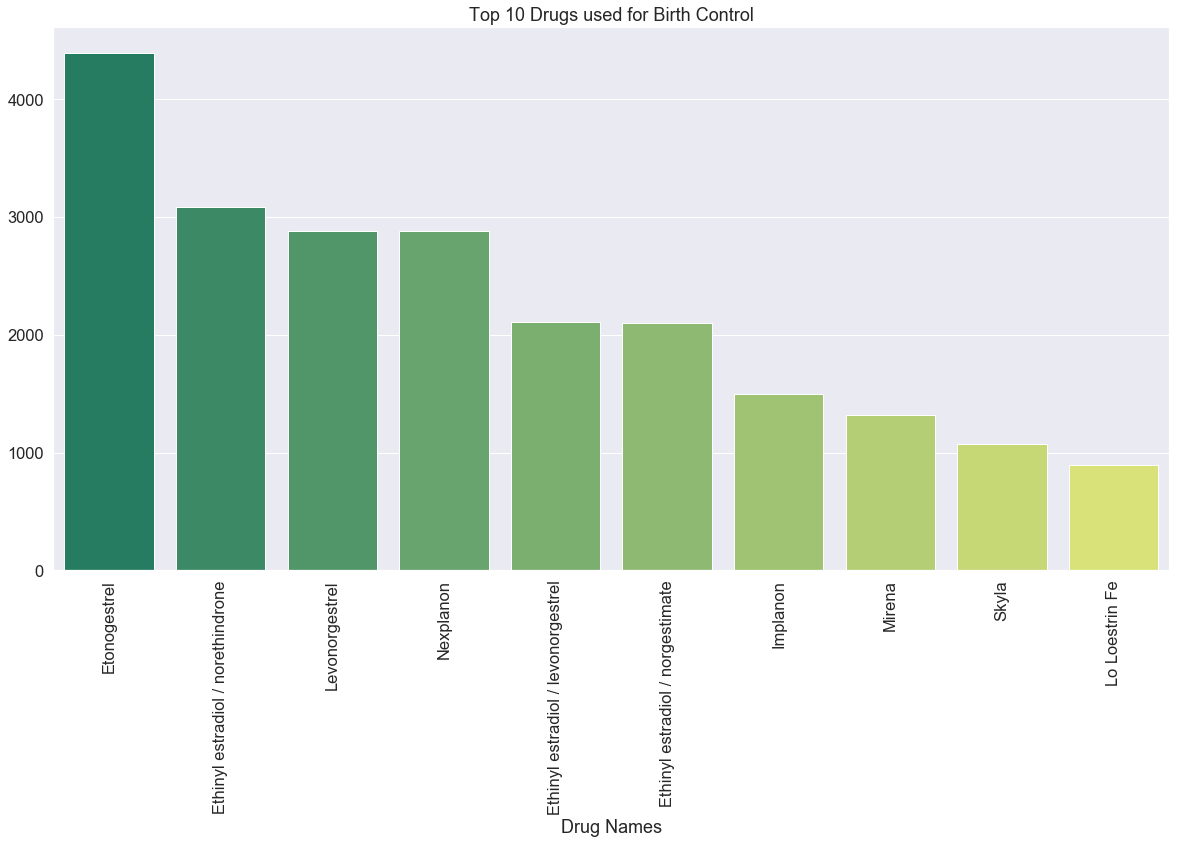

In [27]:
# Create barplot: Top 10 drugs which are used for Birth Control
df = data[data['condition'] == "Birth Control"]['drugname'].value_counts()[0:10]
sns.set(font_scale = 1.5, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

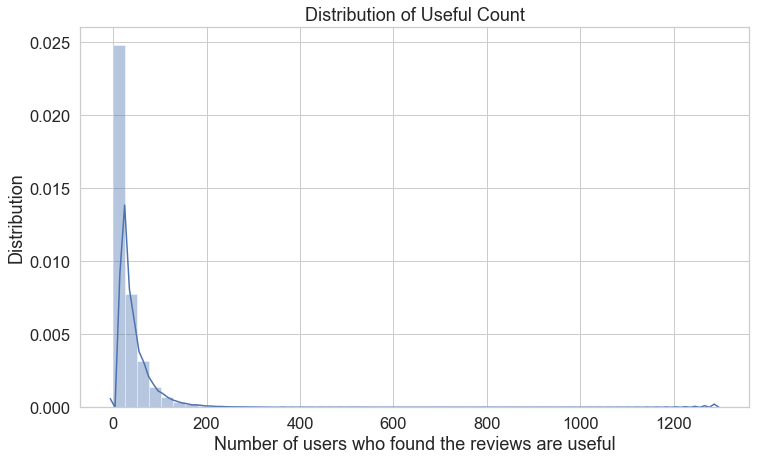

In [28]:
# Distribution of the Useful Count
sns.set(style = 'whitegrid', font_scale = 1.5)
plt.rcParams['figure.figsize'] = [12, 7]
sns.distplot(data['usefulcount'].dropna())

plt.xlabel('Number of users who found the reviews are useful')
plt.ylabel('Distribution')
plt.title('Distribution of Useful Count')

plt.show()

It looks like there is a strong correlation between rating and number of users who found the reviews are useful.

In [29]:
data["usefulcount"].describe()

count    213869.000000
mean         28.094118
std          36.401377
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulcount, dtype: float64

Based on the distribution of usefulcount, there is a difference of 1,291 between minimum and maximum. The number of deviation is 36, which is high. This simply means the more drugs people look for, the more people read the reviews no matter the contents are good or bad. As a result, the number of usefulcount is very high. Thus, we need to normalize it by conditions, considering people's accesiblity. 

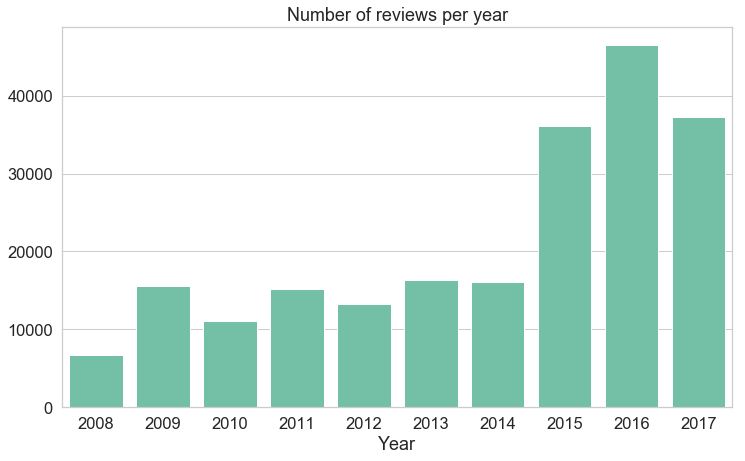

In [30]:
# Create barplot: The number of reviews per year
df = data['date'].dt.year.value_counts()
df = df.sort_index()

sns_ = sns.barplot(x = df.index, y = df.values, color = 'mediumaquamarine')
sns_.set_title("Number of reviews per year")
sns_.set_xlabel("Year");

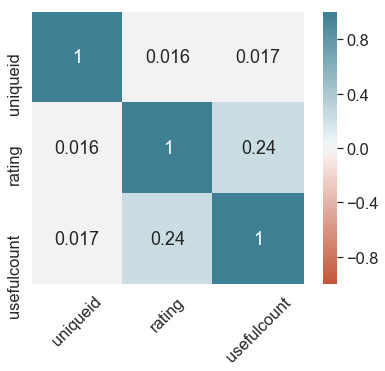

In [31]:
# Heatmap of the Correlation Matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.5)
corr = data.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
                      cmap=sns.diverging_palette(20,220, n=220), 
                       square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);

In [32]:
# Top 20 Unigrams based on Rating

data_ = data[['rating', 'review']]
data_['review'] = data['review'].str.replace("I&#039;", "")
data_['review'] = data['review'].str.replace(r'[^\w\d\s]', '')

data_review_5 = "".join(data_.loc[data_.rating <= 5, 'review'])
data_review_10 = "".join(data_.loc[data_.rating <= 10, 'review'])

# Tokenization
token_review_5 = word_tokenize(data_review_5)
token_review_10 = word_tokenize(data_review_10)

# Unigrams
uni_5 = ngrams(token_review_5, 1)
uni_10 = ngrams(token_review_10, 1)

# Frequency
freq_5 = Counter(uni_5)
freq_10 = Counter(uni_10)

data_5 = pd.DataFrame(freq_5.most_common(20))
data_10 = pd.DataFrame(freq_10.most_common(20))

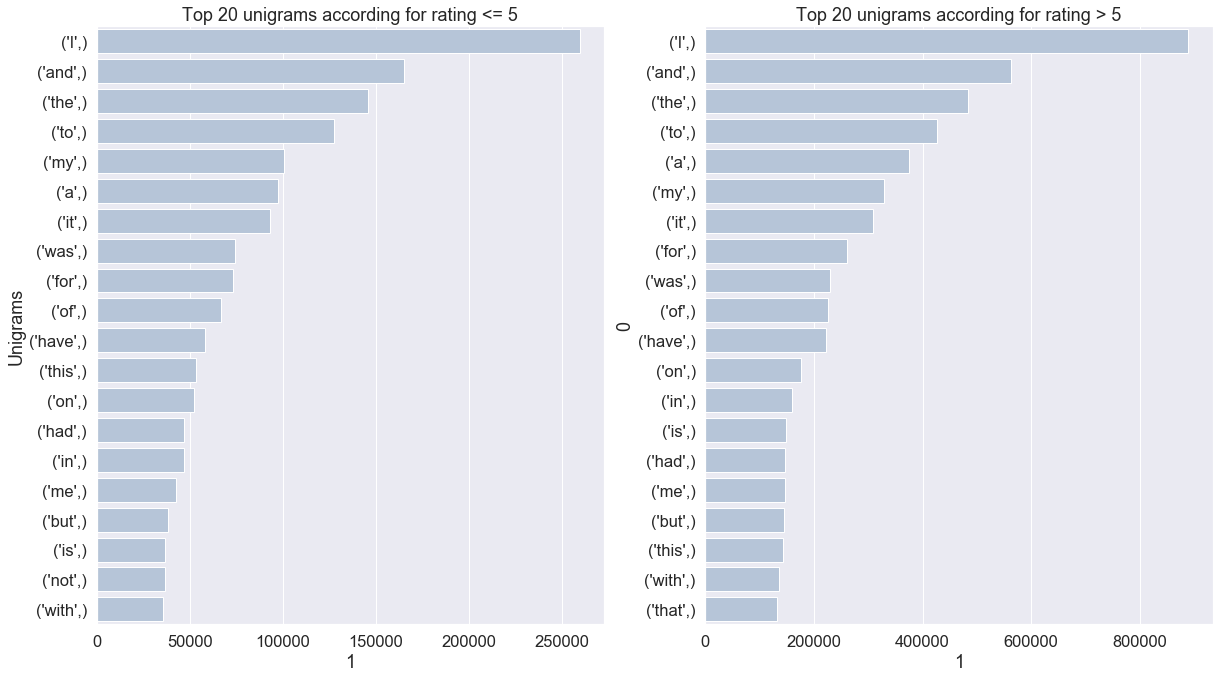

In [33]:
# Create barplot: Top 20 Unigrams
plt.rcParams['figure.figsize'] = [20,11]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_5 = sns.barplot(x = data_5[1], y = data_5[0], color = 'lightsteelblue', ax = ax[0])
sns_10 = sns.barplot(x = data_10[1], y = data_10[0], color = 'lightsteelblue', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 unigrams according for rating <= 5")
sns_10.set_title("Top 20 unigrams according for rating > 5")
sns_5.set_ylabel("Unigrams");

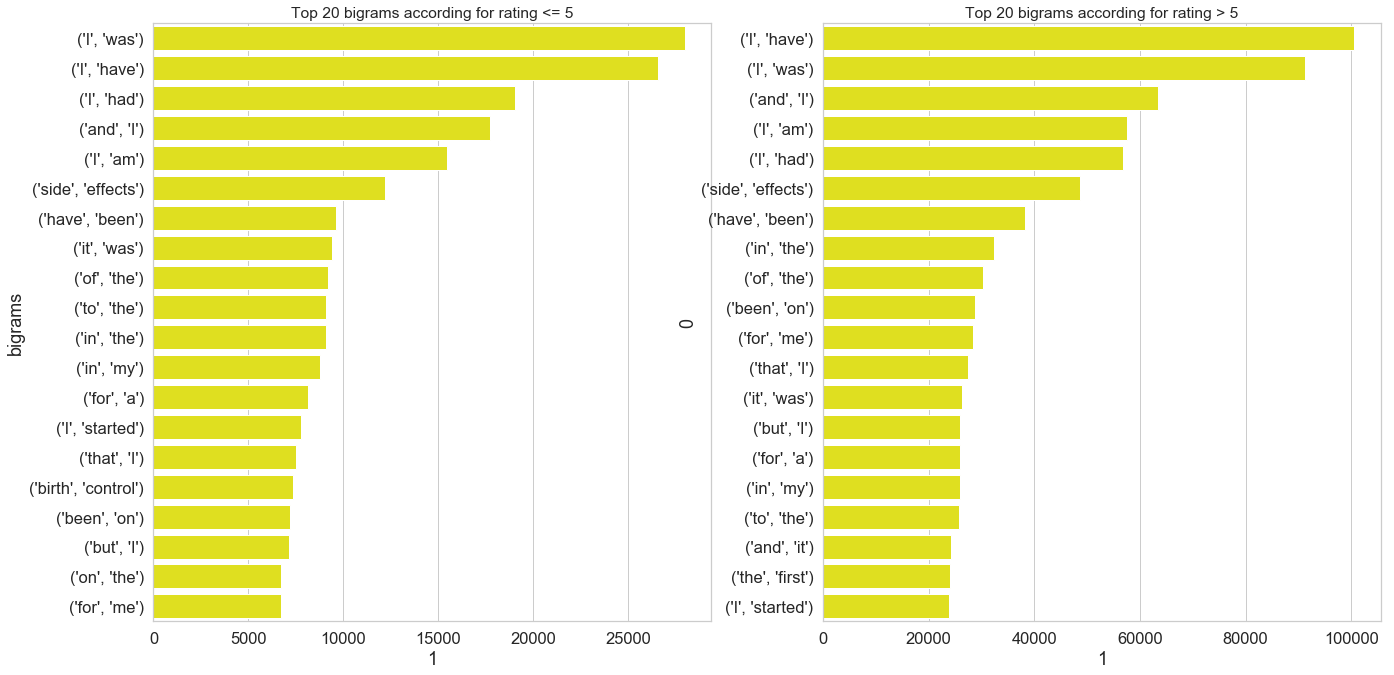

In [34]:
# Top 20 Bigrams based on Rating

bigrams_5 = ngrams(token_review_5, 2)
bigrams_10 = ngrams(token_review_10, 2)

freq_5 = Counter(bigrams_5)
freq_10 = Counter(bigrams_10)

data_5 = pd.DataFrame(freq_5.most_common(20))
data_10 = pd.DataFrame(freq_10.most_common(20))

# Barplot that shows the top 20 bigrams
plt.rcParams['figure.figsize'] = [22,11]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style = 'whitegrid')

sns_5 = sns.barplot(x = data_5[1], y = data_5[0], color = 'yellow', ax = ax[0])
sns_10 = sns.barplot(x = data_10[1], y = data_10[0], color = 'yellow', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 bigrams according for rating <= 5")
sns_10.set_title("Top 20 bigrams according for rating > 5")
sns_5.set_ylabel("bigrams");

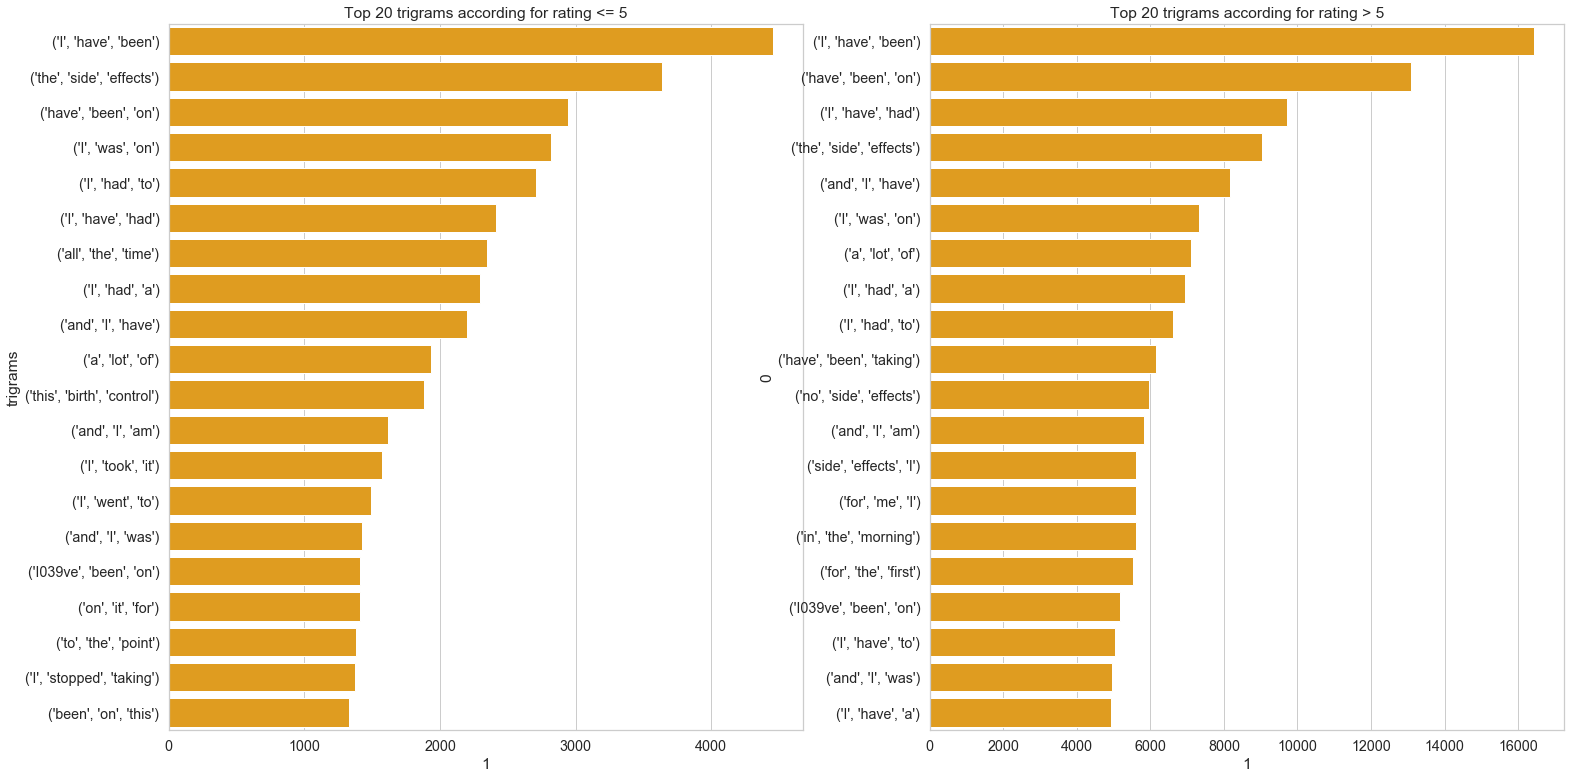

In [35]:
# Top 20 Trigrams according to the rating

trigrams_5 = ngrams(token_review_5, 3)
trigrams_10 = ngrams(token_review_10, 3)

freq_5 = Counter(trigrams_5)
freq_10 = Counter(trigrams_10)

data_5 = pd.DataFrame(freq_5.most_common(20))
data_10 = pd.DataFrame(freq_10.most_common(20))

# Barplot that shows the top 20 trigrams
plt.rcParams['figure.figsize'] = [25,13]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style = 'whitegrid')

sns_5 = sns.barplot(x = data_5[1], y = data_5[0], color = 'orange', ax = ax[0])
sns_10 = sns.barplot(x = data_10[1], y = data_10[0], color = 'orange', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 trigrams according for rating <= 5")
sns_10.set_title("Top 20 trigrams according for rating > 5")
sns_5.set_ylabel("trigrams");

### Step 3 - Data Preparation <a id='S3'></a></br><a href='#C'><font size=2><i>(Back to Contents) ↑</i></font></a>
#### <u>Removing Stop Words</u><a id='RS'></a>

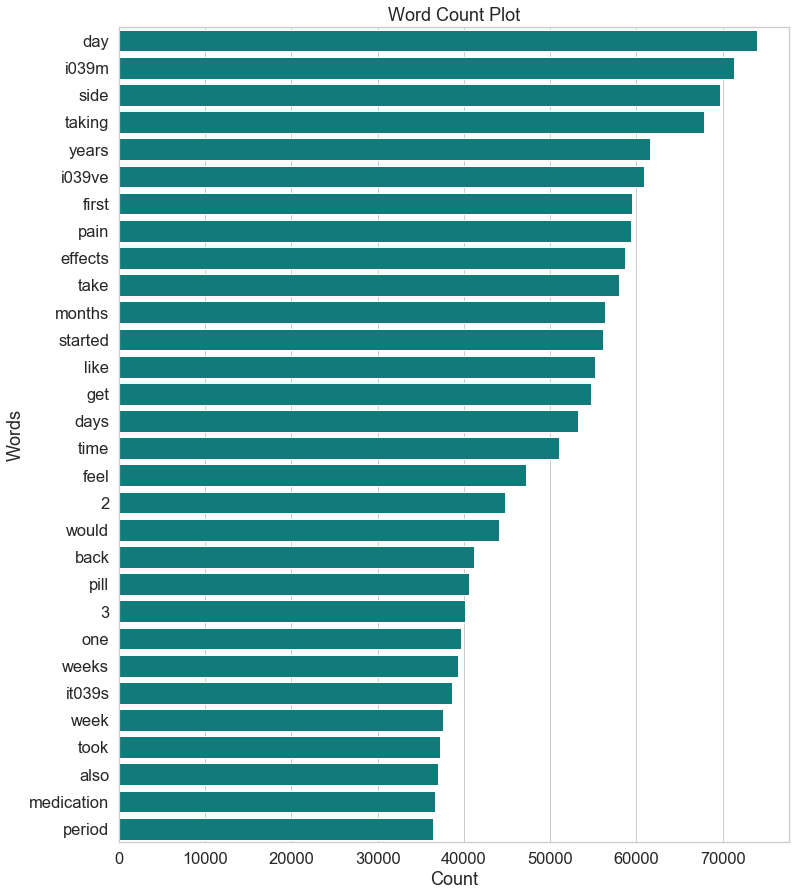

In [36]:
# Removing the stop words before plotting
stop_words = set(stopwords.words('english'))
data_['review'] = data_['review'].str.lower()
data_['review_1'] = data_['review'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
data_review = " ".join(data_['review_1'])
tokenize = word_tokenize(data_review)
frequency = Counter(tokenize)
data = pd.DataFrame(frequency.most_common(30))

plt.rcParams['figure.figsize'] = [12, 15]
sns.set(font_scale = 1.5, style = 'whitegrid')

# Plotting
word_count = sns.barplot(x = data[1], y = data[0], color = 'darkcyan')
word_count.set_title("Word Count Plot")
word_count.set_ylabel("Words")
word_count.set_xlabel("Count");

Now, let's preprocess the reviews for best polarity and classification.

In [51]:
# Creating the sentiment based on ratings
data['sentiment_rate'] = data['rating'].apply(lambda x: 1 if x > 5 else 0)

In [52]:
# Cleaning the reviews data
def review_clean(review): 
    
    # changing to lowercase
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multi_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multi_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [53]:
# Applying data['review_clean'] into review
data['review_clean'] = review_clean(data['review'])

In [54]:
# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [55]:
# Removing the word stems using the Snowball Stemmer
snowball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(snowball.stem(word) for word in x.split()))

Let's test and check if the reviews are clean...

In [56]:
data['review_clean'][0:20]

0     depo inject sinc januari 2015 bleed stop anoth...
1     im 21 year old recent found might pcos havent ...
2     shot 11 year month ago never 1 period even spo...
3     ive four shot point birth control pill year du...
4     total 3 shot got first one leav hospit give bi...
5     horribl shot got first shot august ever sinc e...
6     im 18 got heavi bleed ive alway heard bc make ...
7     im 19 heavi pain period sinc forev got depo sh...
8     im 30 year old woman got shot august 9th bleed...
9     im 17 year old got shot august 2015 person don...
10    first month awesom absolut wonder start light ...
11    start depo shot year ago origin bled 3 week da...
12    im 24 ive 2 year quit period last 3 week first...
13    im 17 went depo heavi bleed like heavi would g...
14    love conveni one shot everi three month look b...
15    1st shot sept 2nd nonstop bleed sinc side effe...
16    took shot safe im young teenag sexual activ bi...
17    ive shot 2 year amp one complaint skin cou

In [57]:
# Separate the day, month, year from the date
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [58]:
# Check date format is YYYY-MM-DD
data.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,depo inject sinc januari 2015 bleed stop anoth...,28,10,2015
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,im 21 year old recent found might pcos havent ...,27,10,2015
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,shot 11 year month ago never 1 period even spo...,27,10,2015
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,ive four shot point birth control pill year du...,26,10,2015
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,total 3 shot got first one leav hospit give bi...,25,10,2015


In [59]:
# Applying sentiment polarity to the reviews

def sentiment(review):
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [60]:
data['sentiment'] = sentiment(data['review'])

In [61]:
data['sentiment_clean'] = sentiment(data['review_clean'])

In [62]:
np.corrcoef(data['sentiment'], data['rating'])

array([[1.       , 0.3481753],
       [0.3481753, 1.       ]])

In [63]:
np.corrcoef(data['sentiment_clean'], data['rating'])

array([[1.        , 0.23328393],
       [0.23328393, 1.        ]])

Comparing the results above, the correlation shows the uncleaned review with rating has higher score than the cleaned review. I'm curious if applying the Snowball stemmer and not removing the stop words would have better chance in improving the coefficient score results.

In [64]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
data['review_clean_sbstem'] = review_clean(data['review'])
data['sentiment_clean_sbstem'] = sentiment(data['review_clean_sbstem'])

In [65]:
np.corrcoef(data['sentiment_clean_sbstem'], data['rating'])

array([[1.        , 0.34600369],
       [0.34600369, 1.        ]])

It looks like there is no much difference. Now let's check the top 20 patient conditions.

In [66]:
data['condition'].value_counts().head(20)

Birth Control                38436
Depression                   12164
Pain                          8245
Anxiety                       7812
Acne                          7435
Bipolar Disorde               5604
Insomnia                      4904
Weight Loss                   4857
Obesity                       4757
ADHD                          4509
Diabetes, Type 2              3362
Emergency Contraception       3290
High Blood Pressure           3104
Vaginal Yeast Infection       3085
Abnormal Uterine Bleeding     2744
Bowel Preparation             2498
Smoking Cessation             2440
ibromyalgia                   2370
Migraine                      2277
Anxiety and Stress            2236
Name: condition, dtype: int64

In [67]:
data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year,sentiment,sentiment_clean,review_clean_sbstem,sentiment_clean_sbstem
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,depo inject sinc januari 2015 bleed stop anoth...,28,10,2015,-0.287798,-0.127381,been on the depo injection since january 2015 ...,-0.160714
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,im 21 year old recent found might pcos havent ...,27,10,2015,0.175357,0.161429,im 21 years old and recently found out i might...,0.175357
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,shot 11 year month ago never 1 period even spo...,27,10,2015,-0.210000,0.233333,i have been on the shot 11 years and until a m...,-0.210000
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,ive four shot point birth control pill year du...,26,10,2015,-0.022500,0.069444,ive had four shots at this point i was on birt...,-0.033333
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,total 3 shot got first one leav hospit give bi...,25,10,2015,0.044872,0.103333,i had a total of 3 shots i got my first one be...,0.044872
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,2015-10-24,3,0,horribl shot got first shot august ever sinc e...,24,10,2015,0.000321,0.013235,this is a horrible shot i got my first shot in...,0.000321
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,2015-10-22,6,0,im 18 got heavi bleed ive alway heard bc make ...,22,10,2015,-0.056692,0.098052,im 18 and got this for heavy bleeding ive alwa...,-0.065025
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,2015-10-21,2,0,im 19 heavi pain period sinc forev got depo sh...,21,10,2015,0.030995,0.068750,im 19 and have been having heavy and painful p...,0.026923
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,2015-10-21,5,0,im 30 year old woman got shot august 9th bleed...,21,10,2015,0.265309,0.288889,im a 30 year old woman i got the shot on augus...,0.265309
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,2015-10-20,2,1,im 17 year old got shot august 2015 person don...,20,10,2015,-0.047222,-0.022500,im 17 years old and i got shot in august 2015 ...,-0.047222


#### <u>Feature Engineering</u><a id='FE'></a>

In [68]:
# Word count in each review
data['count_word']= data["review_clean_sbstem"].apply(lambda x: len(str(x).split()))

# Unique word count 
data['count_unique_word']= data["review_clean_sbstem"].apply(lambda x: len(set(str(x).split())))

# Letter count
data['count_letters']= data["review_clean_sbstem"].apply(lambda x: len(str(x)))

# Punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

# Title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

# Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

# Average length of the words
data["mean_word_len"] = data["review_clean_sbstem"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [69]:
data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount', 'sentiment_rate', 'review_clean', 'day', 'month', 'year',
       'sentiment', 'sentiment_clean', 'review_clean_sbstem',
       'sentiment_clean_sbstem', 'count_word', 'count_unique_word',
       'count_letters', 'count_punctuations', 'count_words_upper',
       'count_words_title', 'count_stopwords', 'mean_word_len'],
      dtype='object')

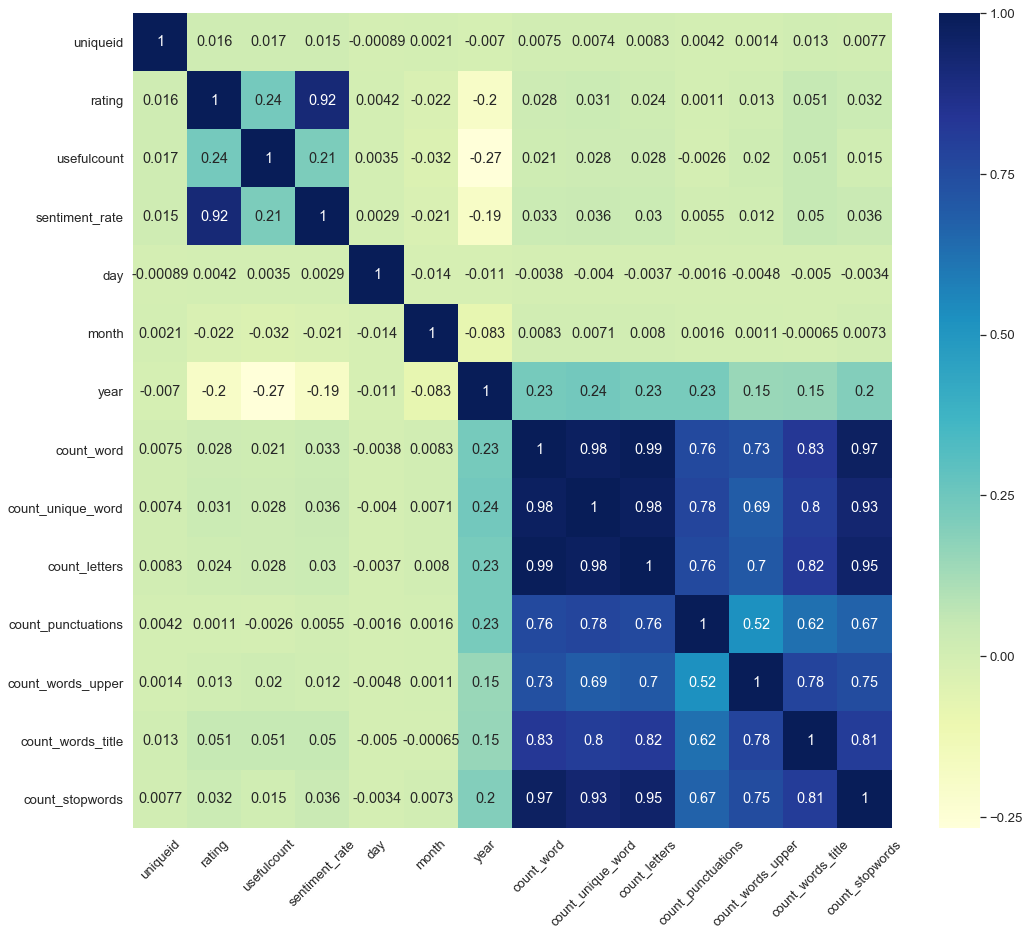

In [70]:
# Heatmap Correlation
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.setp(sns_.get_xticklabels(), rotation = 45);

In [71]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugname', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

### Step 4 - Machine Learning Algorithms <a id='S4'></a></br><a href='#C'><font size=2><i>(Back to Contents) ↑</i></font></a>

In [72]:
# Importing Libraries for lightGBM, XGBoost, and CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMModel, LGBMClassifier, plot_importance
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [73]:
# Defining Features and splitting the data into train and test set

features = data[['condition', 'usefulcount', 'sentiment', 'day', 'month', 'year',
                'sentiment_clean_sbstem', 'count_word', 'count_unique_word', 'count_letters',
                'count_punctuations', 'count_words_upper', 'count_words_title', 'count_stopwords',
                'mean_word_len']]

target = data['sentiment_rate']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print("The Train set size is ", X_train.shape)
print("The Test set size is ", X_test.shape)

The Train set size is  (149708, 15)
The Test set size is  (64161, 15)


#### <u>LightGBM</u><a id='LGB'></a>

Light GBM is a gradient boosting framework that based on decision tree algorithm, usually used for ranking and classification.

In [74]:
# Training Model
gbm_clf = LGBMClassifier(
        n_estimator=1000, 
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9, 
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,)

gbm_model = gbm_clf.fit(X_train, y_train)

# Predictions
gbm_pred = gbm_model.predict(X_test)
print("The Accuracy of the model is: ", accuracy_score(y_test, gbm_pred))
print("The Confusion Matrix is ")
confusion_matrix(y_test, gbm_pred)

The Accuracy of the model is:  0.7669768239273078
The Confusion Matrix is 


array([[ 8210, 11135],
       [ 3816, 41000]], dtype=int64)

The confusion matrix tells us that (TP) every 8210 patients are satisfied with the recommended drugs and are predicted satisified; (TN) 3816 patients are satisfied with the recommended drugs but predicted as dissatisfied. Whereas, (FP) 11135 patients are dissatified with the recommended drugs and are predicted satisfied; (FN) 41000 patients are dissatisfied with the recommended drugs but predicted as dissatisfied. 

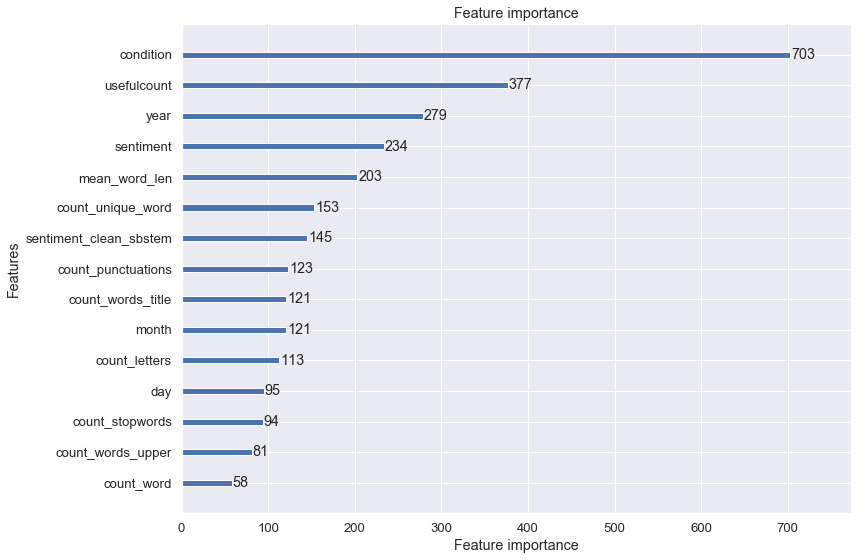

In [75]:
#Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
plot_importance(gbm_model);

#### <u>XGBoost</u><a id='XGB'></a>

In [76]:
#Training Model
from xgboost import plot_importance
xgb_clf = XGBClassifier(n_estimator=1000,
                       learning_rate=0.10,
                       num_leaves=30)

xgb_model = xgb_clf.fit(X_train, y_train)

#Predictions
xgb_pred = xgb_model.predict(X_test)
print("The Accuracy of the model is: ", accuracy_score(y_test, xgb_pred))
print("The confusion matrix is ")
confusion_matrix(y_test, xgb_pred)

The Accuracy of the model is:  0.7685042315425258
The confusion matrix is 


array([[ 8197, 11148],
       [ 3705, 41111]], dtype=int64)

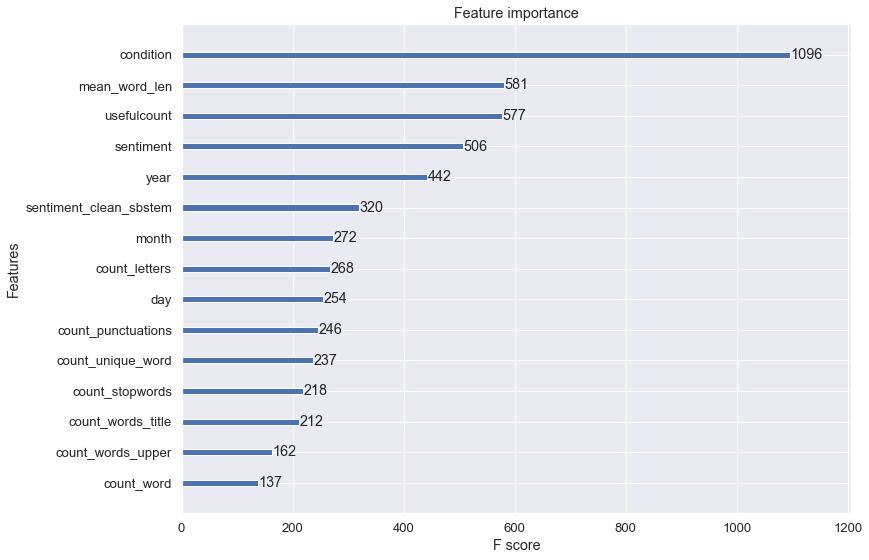

In [77]:
#Feature Imporance Plot using XGBClassifier
plt.rcParams['figure.figsize'] = [12, 9]
plot_importance(xgb_model)

#### <u>CatBoostClassifier</u><a id='CBC'></a>

In [78]:
#Training Model
cb_clf = CatBoostClassifier(iterations=1000,
                           learning_rate=0.5)

cb_model = cb_clf.fit(X_train, y_train)

#Predictions
cb_pred = cb_model.predict(X_test)
print("The Accuracy of the model is: ", accuracy_score(y_test, cb_pred))
print("The confusion matrix is")
confusion_matrix(y_test, cb_pred)

0:	learn: 0.5609381	total: 157ms	remaining: 2m 36s
1:	learn: 0.5277483	total: 206ms	remaining: 1m 42s
2:	learn: 0.5150090	total: 246ms	remaining: 1m 21s
3:	learn: 0.5104798	total: 269ms	remaining: 1m 6s
4:	learn: 0.5071169	total: 291ms	remaining: 57.9s
5:	learn: 0.5027690	total: 316ms	remaining: 52.3s
6:	learn: 0.5007075	total: 340ms	remaining: 48.2s
7:	learn: 0.4989878	total: 372ms	remaining: 46.1s
8:	learn: 0.4979243	total: 403ms	remaining: 44.4s
9:	learn: 0.4962943	total: 433ms	remaining: 42.8s
10:	learn: 0.4953245	total: 461ms	remaining: 41.4s
11:	learn: 0.4945540	total: 493ms	remaining: 40.6s
12:	learn: 0.4938198	total: 520ms	remaining: 39.5s
13:	learn: 0.4927593	total: 551ms	remaining: 38.8s
14:	learn: 0.4921763	total: 581ms	remaining: 38.2s
15:	learn: 0.4918577	total: 613ms	remaining: 37.7s
16:	learn: 0.4914118	total: 662ms	remaining: 38.3s
17:	learn: 0.4902410	total: 709ms	remaining: 38.7s
18:	learn: 0.4893736	total: 748ms	remaining: 38.6s
19:	learn: 0.4885278	total: 779ms	rema

array([[10974,  8371],
       [ 4178, 40638]], dtype=int64)

### Step 5 - Evaluation <a id='S5'></a></br><a href='#C'><font size=2><i>(Back to Contents) ↑</i></font></a>

The end goal of this sentiment analysis is to be able to recommend the suitable medicine to treat the patient's conditin based on their reviews. Throughout the three major processes: exploration, preparation, and modeling, I have been able to reveal interesting findings using visualization techniques and statistical techniques. I applied n-grams that represent the patient's emotions, and the relationship with date and rating. Next, I used stopwords to filter out unuseful data such as "the", "an", "a", "am", "in", and etc. This is very important step to do before I projected the data into modeling as it may improves the overall scores. 

Based on the three machine learning algorithm models, it appears that CatBoostClassifier has the highest accuracy score of 80.44%. In other words, we can predict 80.44% whether a patient is satisfied with the drug that has been recommended. Interestingly, LightGBM and XGBoost share similar accuracy score of 76% --even though XGBoost is slightly higher by 0.16%. LightGBM and XGBoost share similar criteria of feature importance such as condition, year, useful count, mean_word_len, and sentiment. Condition takes the first place in both models; followed by the average word of patients' review (mean_word_len) come up the second in XGBoost and number of users who found the reviews are useful (usefulcount) in LightGBM.
